# <center> Evaluation Metrics </center>
<center> Corinne Jones, TA </center>
<center> DATA 558, Spring 2019, University of Washington </center>

In this lab we'll discuss evaluation metrics for classification. By the end of this lab, you should be familiar with precision, recall, precision-recall curves, and ROC curves

## 1 Precision and Recall
Two common methods for evaluating the performance of a classifier on a single class are the precision and recall. Precision is defined as 
$$ \text{Precision} = \frac{\text{# True positives}}{\text{# True positives + # False positives}} $$
and recall is defined as 
$$ \text{Recall} = \frac{\text{# True positives}}{\text{# True positives + # False negatives}}. $$
Suppose we want to identify whether an image contains a toucan (1) or not (0). Then in this case the true positives are the images that contain toucans, the false positives are the images our classifier labeled as having a toucan that in fact did not have a toucan, and the false negatives are the images our classifier labeled as not having a toucan that did in fact have a toucan.

A pictorial description is below. Continuing with the above example, in the picture "positive images" would represent the images containing toucans. The "returned images" would be the images that our classifier labeled as having a toucan.

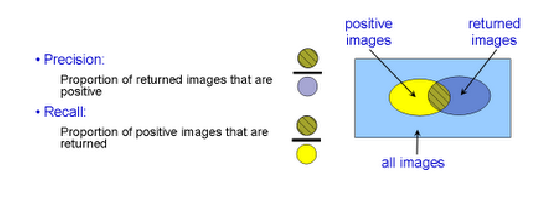

In [3]:
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageOps 
import requests

def display_image(url, figsize):
    response = requests.get(url)
    pca_figure = Image.open(BytesIO(response.content))
    fig, ax = plt.subplots(figsize=figsize)
    fig = ax.imshow(np.asarray(pca_figure), aspect='auto')
    plt.axis('off')
    plt.show()

url = 'http://www.di.ens.fr/willow/events/cvml2013/materials/practicals/category-level-recognition_files/pr1.png'
figsize = (399/45, 137/45)
display_image(url, figsize)

**Exercise 1** Suppose we classified 10 images, that we know their true labels, and that the results are in the following table:
<pre>
Image #:         |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 |
True label:      | +1 | +1 | -1 | -1 | +1 | -1 | +1 | -1 | -1 | -1 |
Classifier label:| -1 | +1 | -1 | -1 | +1 | +1 | +1 | +1 | -1 | -1 |
</pre>
Compute the following:
- Number of true positives: 3
- Number of true negatives: 4
- Number of false positives: 2
- Number of false negatives: 1
- Precision: 3/5
- Recall: 3/4

Let's return to the toucan vs. hornbill example from last week. Again, change `data_dir` if necessary.

In [7]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

data_dir = '../WEEK03/lab3_data'

# Load the data
x_train = np.load(os.path.join(data_dir, 'train_features.npy'))
y_train = np.load(os.path.join(data_dir, 'train_labels.npy'))
x_test = np.load(os.path.join(data_dir, 'val_features.npy'))
y_test = np.load(os.path.join(data_dir, 'val_labels.npy'))

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the classifier
classifier = LogisticRegressionCV()
classifier.fit(x_train, y_train)

# Generate predictions based on a threshold of a probability of 0.5
yhat_test = classifier.predict(x_test)

/Users/willwright/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


**Exercise 2** Compute the precision and recall for the toucan class (without using the sklearn.metrics.precision_score function). Then you can check your code with the code below. 

In [18]:
precision = sum(y_test+yhat_test ==2)/sum(yhat_test)
precision

0.9130434782608695

In [23]:
recall = sum((y_test ==1) & (yhat_test==1))/sum(y_test==1)
recall

0.84

In [24]:
import sklearn.metrics

precision_sklearn = sklearn.metrics.precision_score(y_test, yhat_test)
print('Precision according to sklearn = %0.2f' % precision_sklearn)
recall_sklearn = sklearn.metrics.recall_score(y_test, yhat_test)
print('Recall according to sklearn = %0.2f' % recall_sklearn)

Precision according to sklearn = 0.91
Recall according to sklearn = 0.84


Of the images we labeled as having toucans, 91% of them did in fact have a toucan. Out of all of the images with toucans, we only labeled 84% of them as having toucans.

## 2 Precision-Recall curve
Logistic regression classifiers output a continuous value, and we convert that to $\pm$ 1 (or 1/0) by applying a threshold. Depending on how you set the threshold, you'll get different precision and recall values. In some applications it's very important to have either high precision or high recall. A classic statistical example of this is when trying to assess whether or not people are guilty of a crime. It's terrible to convict an innocent person of a crime, so we would want to have very few (hopefully zero) false positives and aim for very high precision.

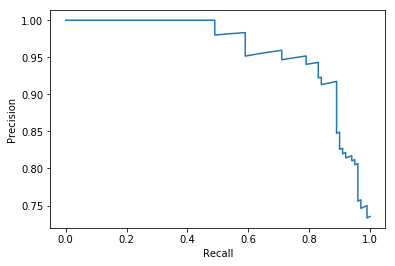

In [25]:
# We can plot a curve of precision and recall values as we change the threshold for what we
# use to assign an image to the toucan class vs. the non-toucan (hornbill) class.
from sklearn.metrics import precision_recall_curve

# Generate estimated values for test observations using the logistic regression classifier
test_probs = classifier.predict_proba(x_test)

precision, recall, thresholds = precision_recall_curve(y_test, test_probs[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## 3 ROC Curve
Another common way to summarize the results is via a receiver operating characteristic (ROC) curve. An ROC curve plots the true positive rate vs. the false positive rate as the threshold is varied. Here we have
$$ \text{True positive rate} = \text{Recall} = \frac{\text{# True positives}}{\text{# True positives + # False negatives}} $$
and
$$ \text{False positive rate} = \frac{\text{# False positives}}{\text{# False positives + # True negatives}}. $$

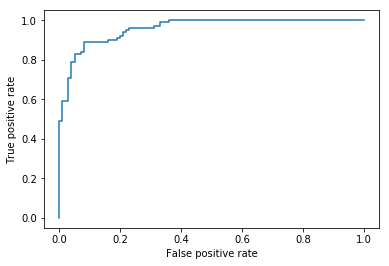

In [26]:
# We can plot a curve of precision and recall values as we change the threshold for what we
# use to assign an image to the toucan class vs. the non-toucan (hornbill) class.
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, test_probs[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Sometimes people give a one-number summary of the above plot called the area under the curve (AUC). The AUC is exactly what it sounds like: the area under the curve above.

In [27]:
# Compute the AUC
roc_auc_score(y_test, test_probs[:, 1])

0.958

**Exercise 3** Find the value of the threshold that gives a false positive rate of at most 1%. Hint: Use the `fpr` and `thresholds` variables we already have.

In [34]:
idx = max(np.where(fpr <= 0.01)[0])

thresholds[idx]

0.9705868956581092

When would you use a precision-recall curve vs. an AUC curve? Suppose your data is skewed and that the number of true negatives is huge (compared to the false positives). Then the ROC curve would lie in the very upper left corner of the plot (It doesn't take into account class imbalance). This would be the case in e.g., web search results. However, as the number of true negatives is not taken into account for the precision-recall curve, the precision-recall curve wouldn't necessarily lie in the very upper right part of its plot. On the other hand, if you care about how the model performs on both the positive and negative classes (e.g., classifying toucans vs. hornbills), you're better off using AUC.